# Plotting
Simple fast plots for the paper

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
# MLP
RUN_ID_MLP = '55445B'
# Random Forest
RUN_ID_RF = '79171R'

good_green = sns.color_palette("Paired")[5]
good_blue = sns.color_palette("Paired")[1]

## Plot ETa

## Measured ETa

<AxesSubplot:xlabel='Day'>

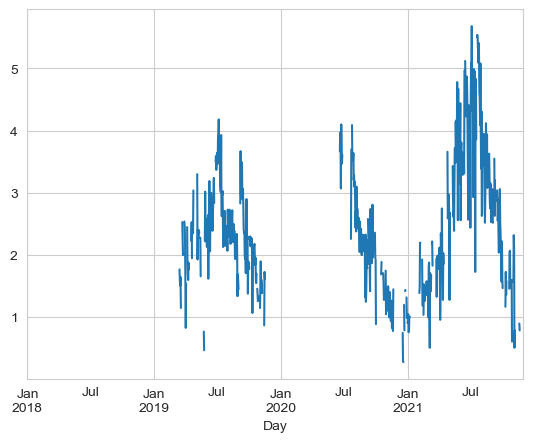

In [27]:
fname = f'data/raw/db_villabate_deficit_9_2018_2021_irr.csv'
df = pd.read_csv(fname, sep=';', decimal=',',
                         index_col=0,
                         parse_dates=True,
                         infer_datetime_format=True,
                         dayfirst=True)
df['ETa'].plot()

In [28]:
def save_series(sns_plot, estimator, run_id):
    sns_plot.savefig(f'visualization/data/predictions_series/eta_series_{estimator}_{run_id}.png', dpi=300)
    sns_plot.savefig(f'visualization/data/predictions_series/eta_series_{estimator}_{run_id}.eps', dpi=300)
    sns_plot.savefig(f'visualization/data/predictions_series/eta_series_{estimator}_{run_id}.pdf', dpi=300)
    return sns_plot

In [29]:
mlp = pd.read_pickle(f'data/predicted/eta_predicted_mlp_model5.pickle')
mlp['Estimator'] = 'MLP'
rf = pd.read_pickle(f'data/predicted/eta_predicted_rf_model4.pickle')
rf['Estimator'] = 'RF'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


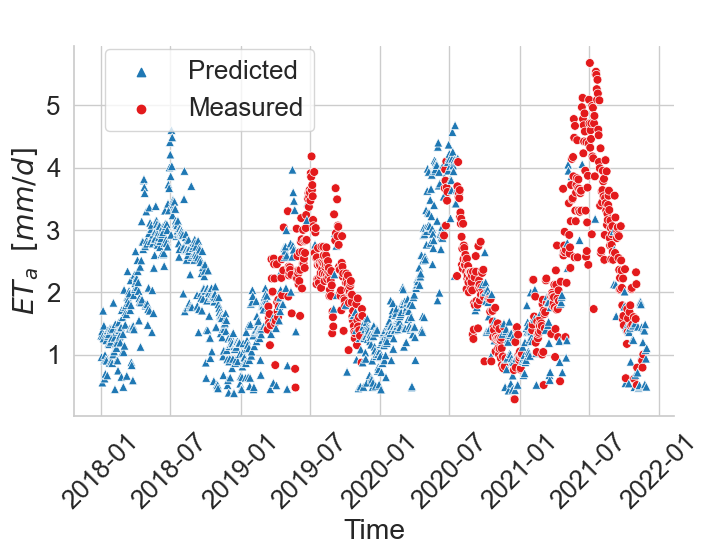

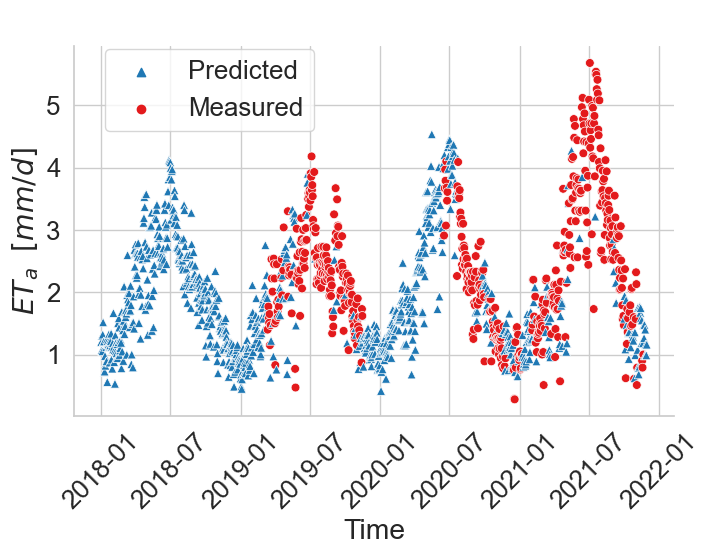

In [30]:
with sns.plotting_context("notebook", font_scale=1.7):
    g1 = sns.relplot(rf, x='Day', y='ETa',
                    hue='Source', style='Source', markers=['^', 'o'],
                    legend=True, s=40,
                    palette=[good_blue, good_green], aspect=1.45)
    plt.xticks(rotation=45)
    leg = g1._legend
    leg.set_bbox_to_anchor([0.35, 0.93])
    leg.set_frame_on(True)
    leg.set_title('')
    g1.set_axis_labels('Time', '$ET_a\;\; [mm/d]$')
    save_series(g1, 'rf', RUN_ID_RF)
    g2 = sns.relplot(mlp, x='Day', y='ETa',
                    hue='Source', style='Source', markers=['^', 'o'],
                    legend=True, s=40,
                    palette=[good_blue, good_green], aspect=1.45)
    g2.set_axis_labels('Time', '$ET_a\;\; [mm/d]$')
    leg = g2._legend
    leg.set_bbox_to_anchor([0.35, 0.93])
    leg.set_frame_on(True)
    leg.set_title('')
    g2.set_axis_labels('Time', '$ET_a\;\; [mm/d]$')
    plt.xticks(rotation=45)
    save_series(g2, 'mlp', RUN_ID_MLP)

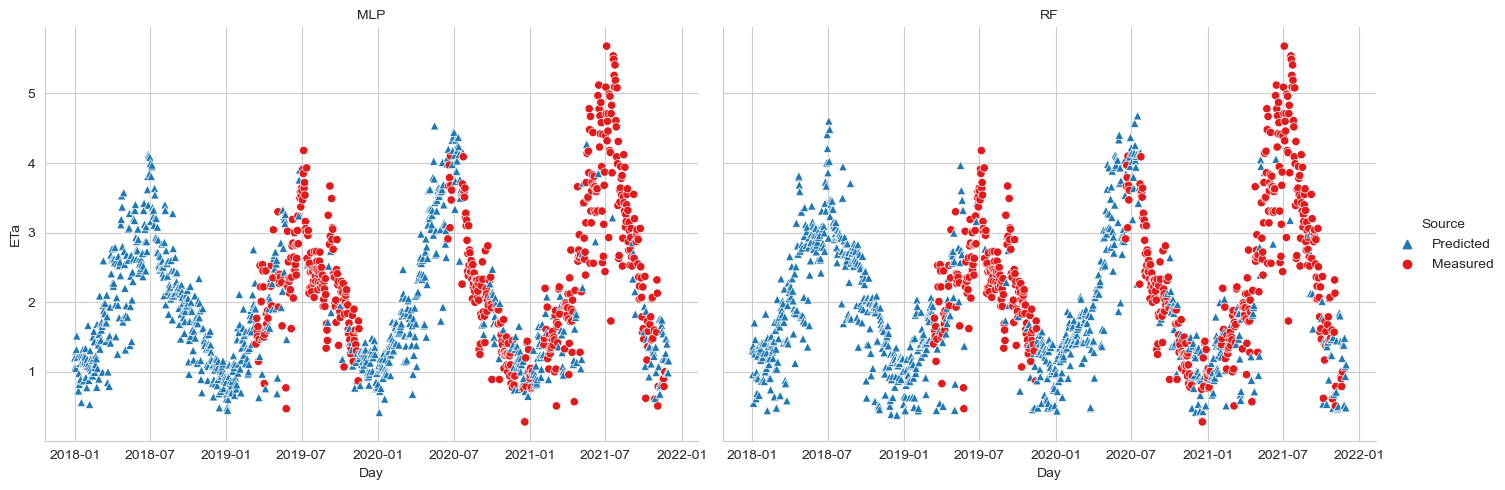

In [31]:
df = pd.concat([mlp, rf])
g = sns.relplot(df, x='Day', y='ETa', col='Estimator',
                hue='Source', style='Source', markers=['^', 'o'],
                palette=[good_blue, good_green], aspect=1.4)
g.set_titles(col_template='{col_name}')
g.savefig(f'visualization/data/predictions_series/eta_series_concat.png', dpi=300)
g.savefig(f'visualization/data/predictions_series/eta_series_concat.eps', dpi=300)
g.savefig(f'visualization/data/predictions_series/eta_series_concat.pdf', dpi=300)

## Scores

In [32]:
scores = pd.read_csv(f'logs/eta_scores_paper.csv',
                     sep=';')
scores_rf = scores.loc[scores['Estimator'] == 'rf']
scores_mlp = scores.loc[scores['Estimator'] == 'mlp']
scores

,Model,Estimator,R2,RMSE,MBE
0,1,MLP,0.82,0.44,0.017
1,2,MLP,0.80,0.45,-0.025
2,3,MLP,0.80,0.46,-0.024
3,4,MLP,0.81,0.44,0.008
4,5,MLP,0.82,0.44,0.005
5,6,MLP,0.78,0.47,0.015
6,7,MLP,0.78,0.48,-0.016
7,8,MLP,0.69,0.57,0.001
8,9,MLP,0.75,0.50,-0.002
9,10,MLP,0.70,0.56,-0.009


Text(25.944444444444457, 0.5, '$R^2$')

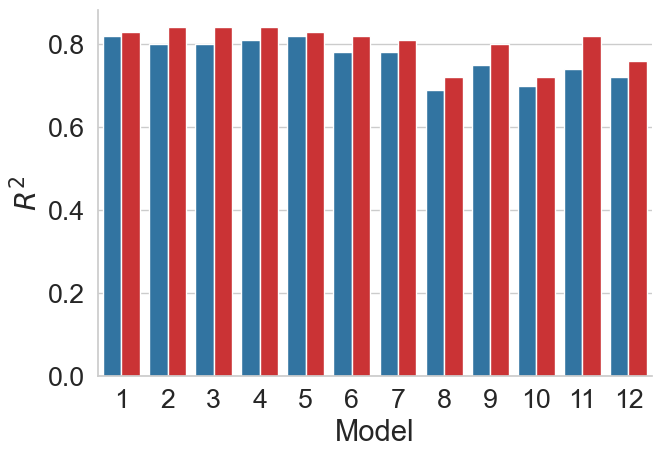

In [33]:
sns.set_context("notebook", font_scale=1.75)
# Create the bar plot
g1 = sns.catplot(data=scores, x='Model', y='R2',
                 hue='Estimator', palette=[good_blue, good_green],
                 legend=False,
                 kind='bar', aspect=1.4)
g1.facet_axis(0, 0).set_ylabel('$R^2$')

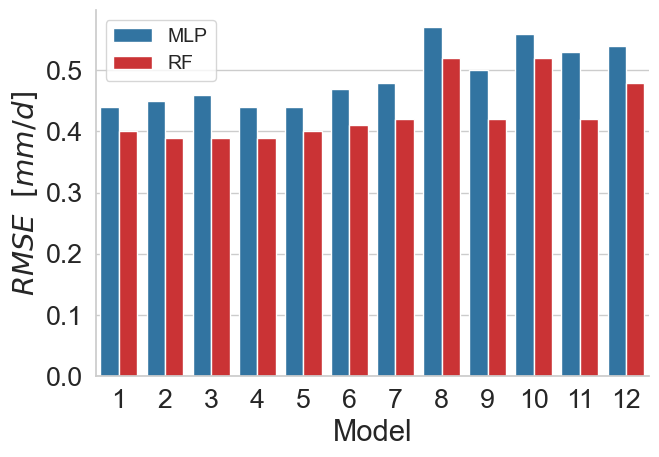

In [34]:
# Create the bar plot
g2 = sns.catplot(data=scores, x='Model', y='RMSE',
                 hue='Estimator', palette=[good_blue, good_green],
                 legend=False,
                 kind='bar', aspect=1.4)
g2.facet_axis(0, 0).set_ylabel('$RMSE\;\; [mm/d]$')
plt.legend(loc='upper left', fontsize=14)

In [35]:
g1.savefig(f'visualization/data/metrics_results/metrics_r2_barplot_paper.png', dpi=300)
g1.savefig(f'visualization/data/metrics_results/metrics_r2_barplot_paper.eps', dpi=300)
g1.savefig(f'visualization/data/metrics_results/metrics_r2_barplot_paper.pdf', dpi=300)
g2.savefig(f'visualization/data/metrics_results/metrics_rmse_barplot_paper.png', dpi=300)
g2.savefig(f'visualization/data/metrics_results/metrics_rmse_barplot_paper.eps', dpi=300)
g2.savefig(f'visualization/data/metrics_results/metrics_rmse_barplot_paper.pdf', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


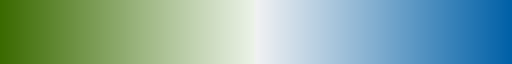

In [36]:
sns.diverging_palette(116, 250, s=100, l=40 , as_cmap=True)